# OLS Linear Regression - Python, Scikit learn and Statmodels

# Boston housing price forecasting 

In [118]:
# Import necessary libraries 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import statsmodels.api as sm

In [119]:
# Importing Boston dataset from sklearn
from sklearn.datasets import load_boston
boston = load_boston()
# Description of Boston house prices dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [120]:
#df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [134]:
# Local file
df = pd.read_csv('Boston_data.csv')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
CRIM          506 non-null float64
ZN            506 non-null float64
INDUS         506 non-null float64
CHAS          506 non-null float64
NOX           506 non-null float64
RM            506 non-null float64
AGE           506 non-null float64
DIS           506 non-null float64
RAD           506 non-null float64
TAX           506 non-null float64
PTRATIO       506 non-null float64
B             506 non-null float64
LSTAT         506 non-null float64
Price         506 non-null float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [123]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


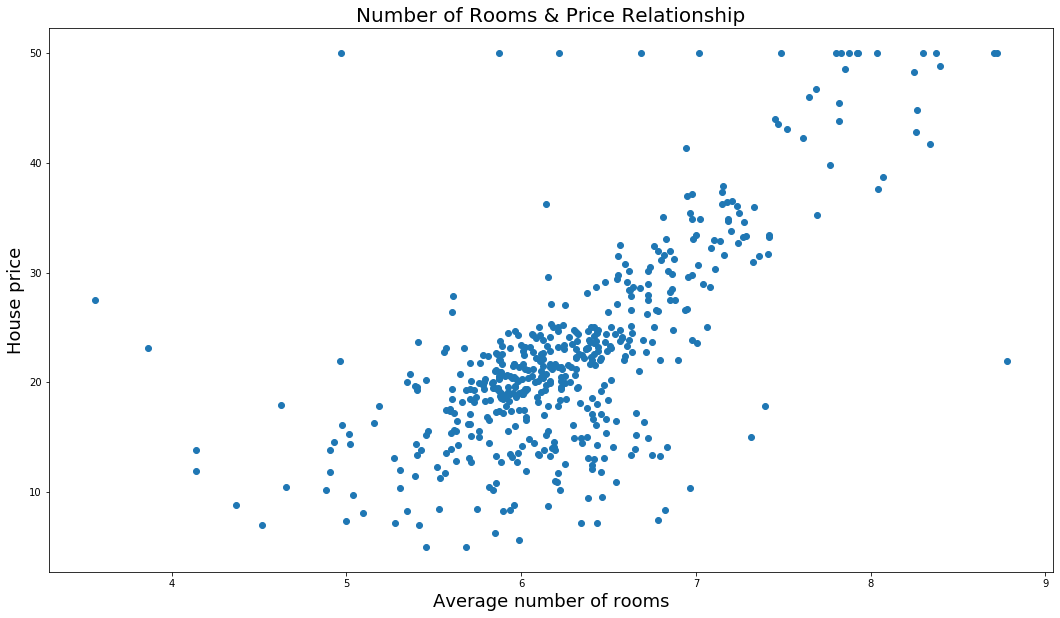

In [142]:
# Plotting price dependances from the number of rooms
ax = plt.subplots(figsize=(18,10))
plt.scatter(df.RM, df.Price)
plt.xlabel('Average number of rooms', fontsize=18)
plt.ylabel('House price', fontsize=18)
plt.title ('Number of Rooms & Price Relationship', fontsize=20);

In [125]:
# Declaring X as average number of rooms per dwelling
X = df[['RM']]

In [144]:
# Declaring Y as target
Y = df[['Price']]

In [127]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
# Fitting the data
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', lm.coef_)

Estimated intercept coefficient: [-34.67062078]
Number of coefficients: [[9.10210898]]


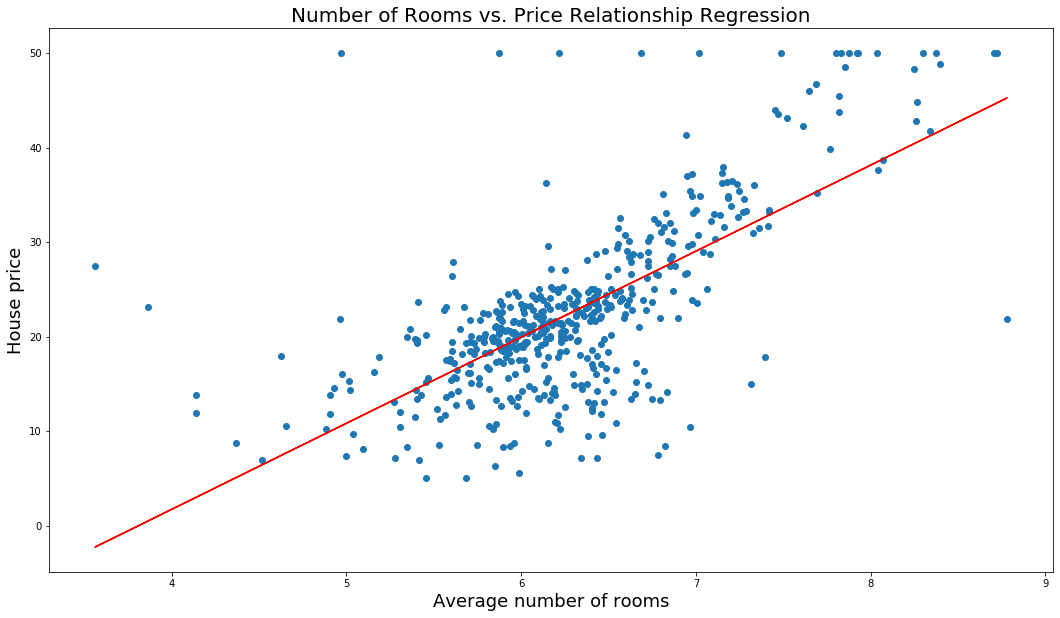

In [146]:
# Linear regression plot
fig, ax = plt.subplots(figsize=(18,10))
plt.scatter(X, Y)
plt.plot(X, lm.predict(X), 'red')
plt.xlabel('Average number of rooms', fontsize=18)
plt.ylabel('House price', fontsize=18)
plt.title ('Number of Rooms vs. Price Relationship Regression', fontsize=20);

In [139]:
# Import stats models to get regression results
from statsmodels.formula.api import ols

In [140]:
# Regression results
m = ols('Y ~ X', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           2.49e-74
Time:                        13:33:42   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

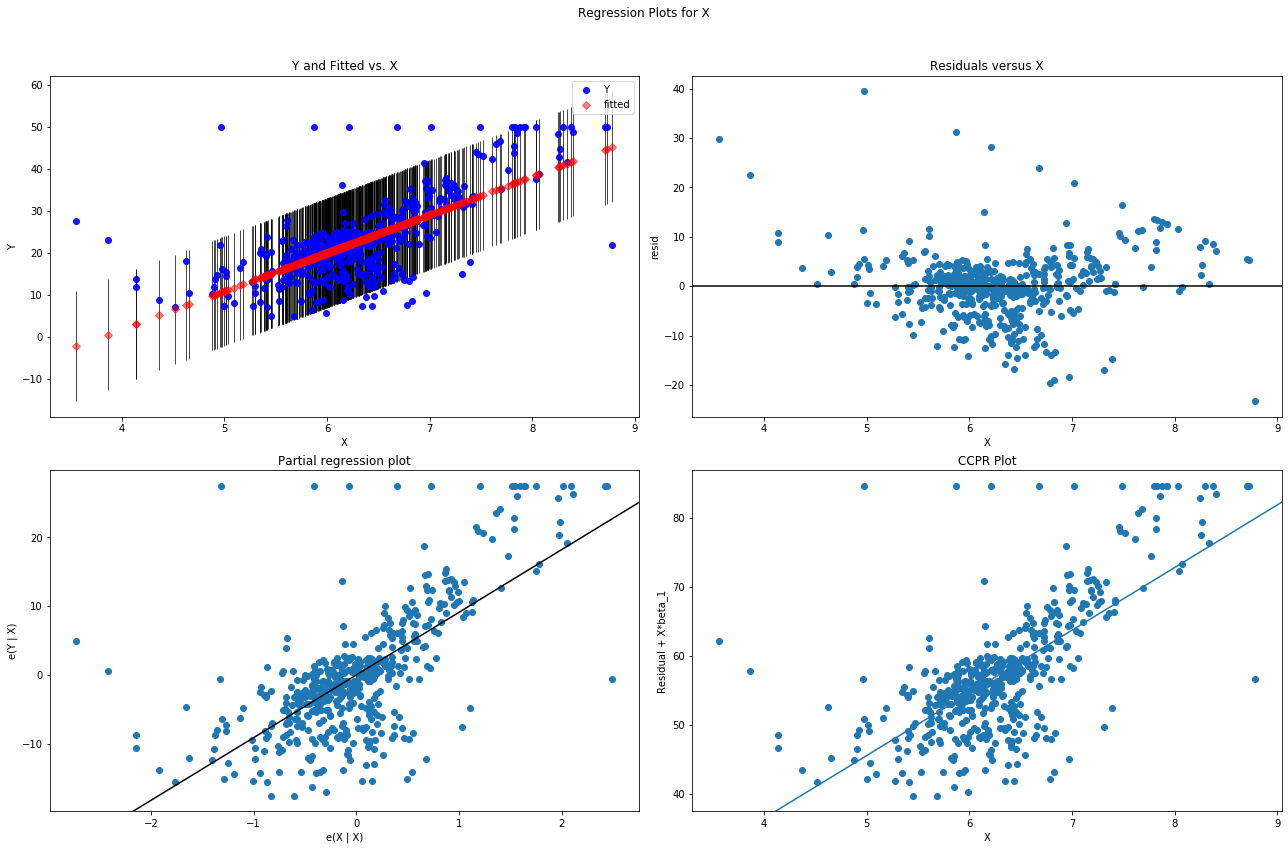

In [141]:
# Regression exploration plots
fig = plt.figure(figsize=(18,12))
fig = sm.graphics.plot_regress_exog(m, 'X', fig=fig)